In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from local_library import data_fetch


In [9]:
fs = 500

In [77]:
Data = data_fetch.data_loader('A6354.mat')

In [78]:
t = np.linspace(0, data.shape[0]/fs, data.shape[0])

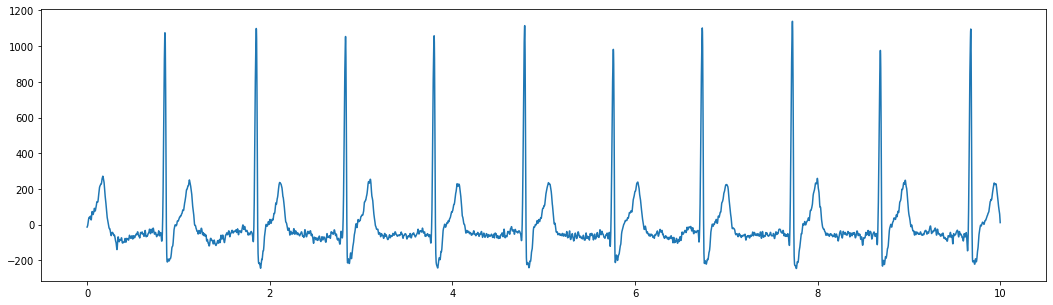

In [79]:
data = Data[:,4]
plt.figure(figsize=(18,5))
plt.plot(t, data)

### Square window average

In [80]:
window_size = 10  # half
for i in range(window_size, len(data)-window_size):
    data[i] = np.mean(data[i-window_size:i+window_size])

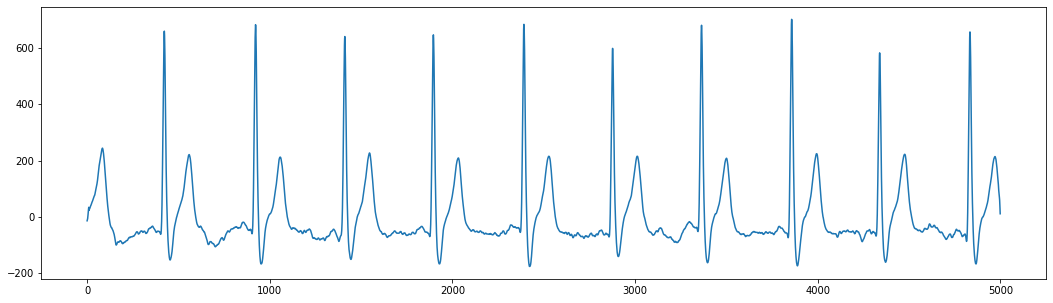

In [81]:
plt.figure(figsize=(18,5))
plt.plot(data)

### In the form of Convolution

In [160]:
def square_filter(data, filter_size = 5, filter_ = 'Avg'):
    #filter_size = 5 # full size. Please keep this number odd
    data = data.copy()
    if filter_ == 'Avg':
        avg_filter = np.array([1 for i in range(filter_size)])/filter_size
    else:
        avg_filter = np.array(filter_)
        filter_size = len(avg_filter)
    filter_sides = int(filter_size/2)
    for i in range(filter_sides, len(data)-filter_sides-1):
        data[i] = np.sum(data[i-filter_sides:i+filter_sides+1]* avg_filter)
        
    return data

In [161]:
data_ = square_filter(data, filter_=[0.1 for i in range(9)])

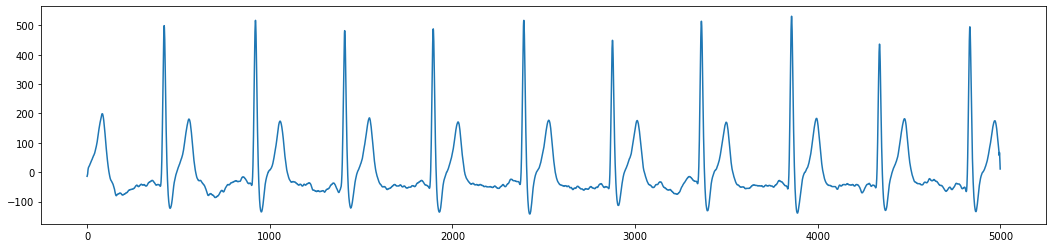

In [162]:
plt.figure(figsize=(18,4))
plt.plot(data_)

In [163]:
def guassian(x, mean, sigma):
    return np.exp( -(x-mean)**2 / (2*sigma**2) )

In [164]:
def g_filter_design(mean=0, std = 1, filter_size = 9,):
    #filter_size = 9 # Please keep this numbrt odd
    filter_sides = int(filter_size/2)
    x = np.arange(-filter_sides,filter_sides+1)
    g_filter = guassian(x,mean, std)
    g_filter /= g_filter.sum()
    #plt.plot(x, g_filter)
    return g_filter

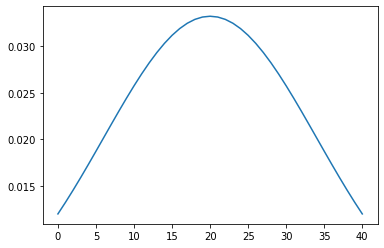

In [239]:
g_filter = g_filter_design(std = 14, filter_size = 41)
plt.plot(g_filter)

In [240]:
data_ = square_filter(data, filter_=g_filter.tolist())

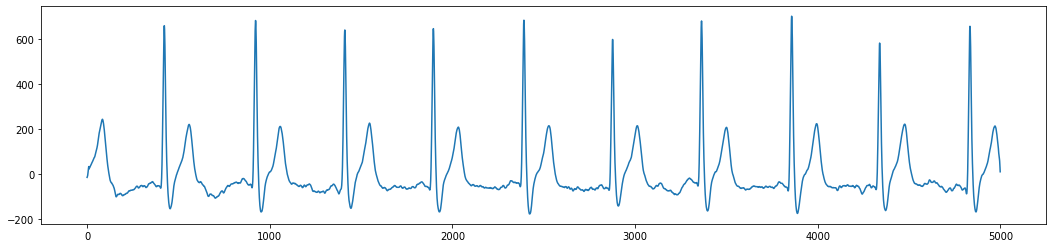

In [241]:
plt.figure(figsize=(18,4))
plt.plot(data)

In [237]:
std_list = [2,2.5,3,4,5,6,10,14,18]
data_list = []
for std in std_list:
    g_filter = g_filter_design(std = std, filter_size = 21)
    data_list.append(square_filter(data, filter_=g_filter.tolist()))

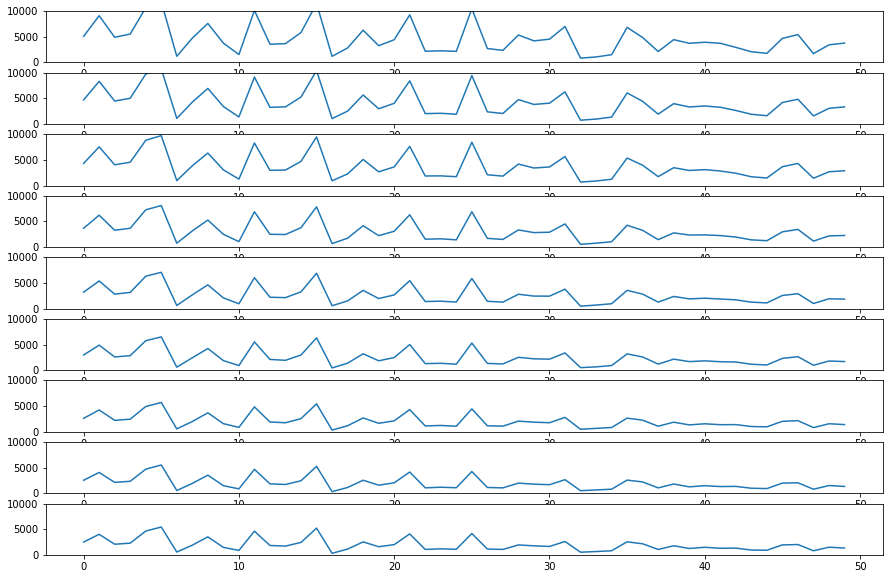

In [238]:
fig, axes = plt.subplots(len(std_list), figsize=(15,10))
for i, ax in enumerate(axes):
    ax.plot(np.abs(np.fft.fft(data_list[i])[200:250]))
    ax.set_ylim([0,10000])
    
    